# CAP379 - Topics in Spatial Science - Prof. Reinaldo

**Course project - Group 1**

- Marcos

- Rubens

- Eduardo

_Last update: 2019-09-09_

## Objectives - Part 2

- AstroML Supervised Classification Examples
 - Gaussian Navie Bayes Classifier with sintetic data
 - Gaussian Navie Bayes Classifier with SuperNova Remnants
- AstroML Neural Network
 - Photometric redshift estimation using SDSS data

## 2 Classification
### 2.1 Simple Gaussian Naive Bayes Classification

A decision boundary computed for a simple data set using Gaussian naive Bayes classification. The line shows the decision boundary, which corresponds to the curve where a new point has equal posterior probability of being part of each class. In such a simple case, it is possible to find a classification with perfect completeness and contamination. This is rarely the case in the real world (VANDERPLAS, J. T. et al., 2012).

In [0]:
!pip install astroML;

     |████████████████████████████████| 102kB 4.6MB/s 
  Created wheel for astroML: filename=astroML-0.4.post1-cp36-none-any.whl size=127933 sha256=0faeacf7bb3754e3db95a97131515bb4ee29f6ebb67d4bdbe871f862d79c240d
  Stored in directory: /root/.cache/pip/wheels/2b/cd/d8/7b04f124752987263edc47a44f7d39d8e2c2b4c82474f6fd5a
Successfully built astroML


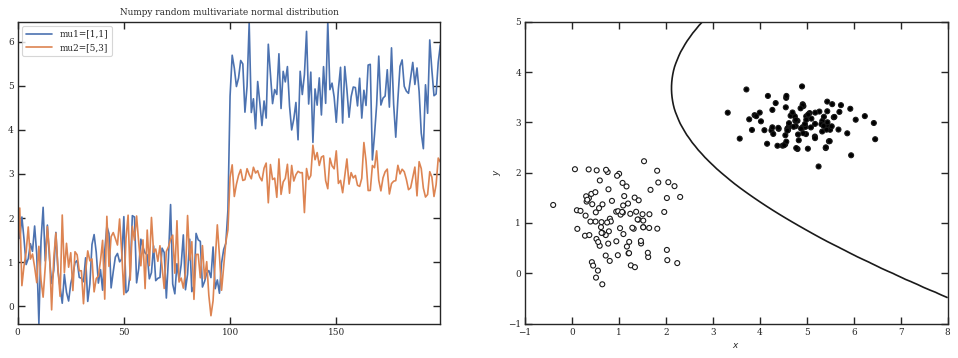

In [0]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), dpi= 80, facecolor='w',
                               edgecolor='k')
ax1.plot(X)
ax1.legend(('mu1=[1,1]','mu2=[5,3]'))
ax1.set_title('Numpy random multivariate normal distribution')

y = np.zeros(200)
y[100:] = 1

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, edgecolors= 'k', zorder=2)

ax2.contour(xx, yy, Z, [0.5], colors='k')

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')

fig.show()


### 2.1.1 Testing Gaussian Navie Bayes Classifier using data of SuperNova Remnants (SNR) from X-Ray Chandra Observatory Catalog

**Acknowledgment:**

To Ph.D student Luis Ricardo to share the convolution neural net features data.

Useful links:
>  http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/  
>  https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea  
>  https://github.com/suvoooo/Machine_Learning/blob/master/SVM_Decision_Boundary/Decision_Boundary_SVM.ipynb

In [0]:
# Enable read data from Gdrive:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive')


Size Train data (features) and Train labels: (815, 5) (815,)
Example featues:
 feat_1    16.432047
feat_3     0.000000
feat_4     0.000000
feat_5    15.830933
feat_6    32.354202
Name: 0, dtype: float32
Result label: 1
              precision    recall  f1-score   support

         SNR       1.00      0.96      0.98       270
     NON_SNR       0.92      1.00      0.96       132

    accuracy                           0.97       402
   macro avg       0.96      0.98      0.97       402
weighted avg       0.97      0.97      0.97       402



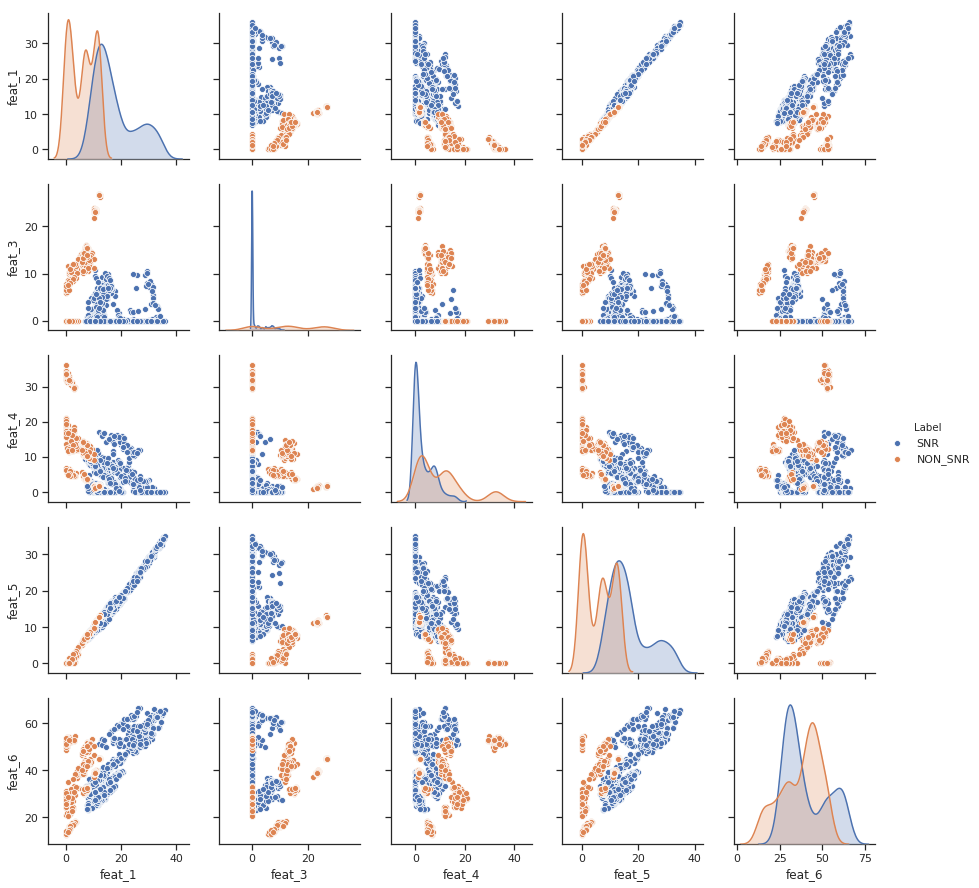

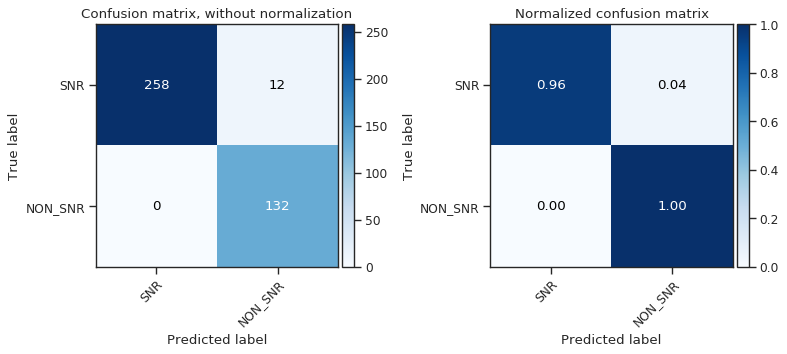

In [0]:
#%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import pandas as pd
import os

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style="ticks")


# Load SNR dataset
pathDataFrame = './topicos/'
df_SNR = pd.read_pickle(os.path.join(pathDataFrame, 'Data_Frame_SNR_features_7.pkl'))
#print(df_SNR.head())



# Assign labels
def ml_tag(self):
  conditions = [ self['Tipo'] == 1, self['Tipo'] == 2]
  outputs = ['SNR','NON_SNR']
  self['Label'] = np.select(conditions, outputs, 'Other')

'''
Classes:
    SNR
    NON_SNR
'''
#RESET INDEX -- 0,1,2,3,4, ... , N
df_SNR = df_SNR.reset_index(drop=True)
df_SNR = df_SNR.drop("feat_2", axis=1)
df_SNR_graf = df_SNR.copy()

# Assign data
ml_tag(df_SNR_graf)
df_SNR_graf = df_SNR_graf.drop("Tipo", axis=1)

#Plot correlation matrix
sns.pairplot(df_SNR_graf, hue="Label")
#plt.savefig(pathDataFrame+'SNR_full_CorrelationMatrix.png',bbox_inches='tight',dpi=150)



# Creating train and test arrays
from sklearn.model_selection import train_test_split
dados_mod = df_SNR.iloc[:,1:6]
dados_label = df_SNR.Tipo


X_train, X_test, y_train, y_test = train_test_split(
    dados_mod,
    dados_label,
    test_size=0.33, 
    shuffle=True,
    random_state=42,
)
print("Size Train data (features) and Train labels:",X_train.shape,y_train.shape)
print("Example featues:\n",X_train.loc[0])
print('Result label:',y_train.loc[0])


#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
prob_pos_clf = clf.predict_proba(X_test)


# Create and Plot confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = clf.predict(X_test)
y_true = y_test
#class_names = dados_label
class_names = np.array(['SNR','NON_SNR'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, fig =None, ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if ax is None:
      fig, ax = plt.subplots()
      
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    #ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print(classification_report(y_true, y_pred, target_names=class_names))

np.set_printoptions(precision=2)

fig2, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), dpi= 80, facecolor='w',
                               edgecolor='k')

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization',fig=fig2,
                     ax=ax1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',fig=fig2,
                     ax=ax2)

fig2.show()
#fig2.savefig(pathDataFrame+'SNR_full_ConfusionMatrix.png',bbox_inches='tight',dpi=150)


### 2.1.2 Revisiting correlation matrix and choose features to ilustrate decision boundary

              precision    recall  f1-score   support

         SNR       0.86      0.95      0.90       270
     NON_SNR       0.87      0.68      0.77       132

    accuracy                           0.86       402
   macro avg       0.87      0.82      0.83       402
weighted avg       0.86      0.86      0.86       402



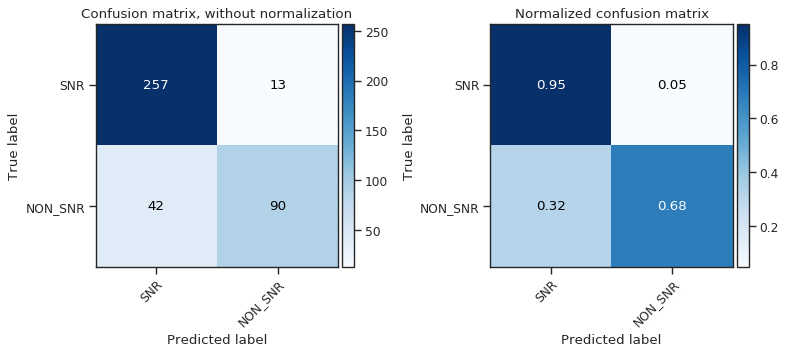

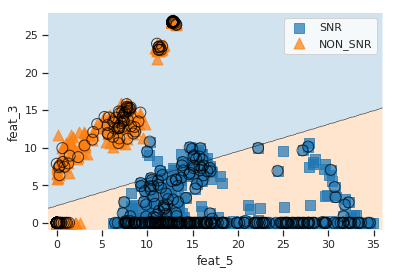

In [0]:
if set(['feat_1','feat_4','feat_6']).issubset(df_SNR.columns):
  df_SNR = df_SNR.drop(["feat_1","feat_4","feat_6"], axis=1)
df_SNR.head()
dados_mod = df_SNR.iloc[:,1:3]
dados_mod = dados_mod.loc[:,::-1] #reverse collumn order
dados_label = df_SNR.Tipo

# Creating train and test arrays
X_train, X_test, y_train, y_test = train_test_split(
    dados_mod,
    dados_label,
    test_size=0.33, 
    shuffle=True,
    random_state=42,
)


#------------------------------------------------------------
#Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
prob_pos_clf = clf.predict_proba(X_test)


y_pred = clf.predict(X_test)
y_true = y_test
#class_names = dados_label
class_names = np.array(['SNR','NON_SNR'])

dados_label = pd.DataFrame(dados_label, columns=['Tipo'])
ml_tag(dados_label)

print(classification_report(y_true, y_pred, target_names=class_names))

np.set_printoptions(precision=2)

fig3, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), dpi= 80, facecolor='w',
                               edgecolor='k')

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization',fig=fig3,
                     ax=ax1)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',fig=fig3,
                     ax=ax2)

fig3.show()
#fig3.savefig(pathDataFrame+'SNR_partial_ConfusionMatrix.png',bbox_inches='tight',dpi=150)


#Ploting decision boundary
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# Specify keyword arguments to be passed to underlying plotting functions
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
# Plotting decision regions
plot_decision_regions(dados_mod.to_numpy(), dados_label.Tipo.to_numpy(), clf=clf, legend=1,
                      X_highlight=X_test.to_numpy(),
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# call plt.legend() with the new values
plt.legend(current_handles,class_names)

# Adding axes annotations
plt.xlabel('feat_5')
plt.ylabel('feat_3')
plt.title('')

#plt.savefig(pathDataFrame+'SNR_partial_decisionBoundary.png',bbox_inches='tight',dpi=150)
plt.show()



### 2.2  Estimate the photometric redshift of galaxies using Artificial Neural Network
This example show the estimation of redshifts galaxies using SDSS dataset and feed-forward neural network Multilayer Perceptron (MLP) builded over module **nn** in Pytorch package. Pytorch is an open source machine learning library based on the Torch library (COLLOBERT; KAVUKCUOGLU; FARABET, 2011), used for applications such as computer vision and natural language processing. This library provides Tensors and Dynamic neural networks in Python with strong GPU acceleration.  


@pickle_results: using precomputed results from 'NNphotoz.pkl'


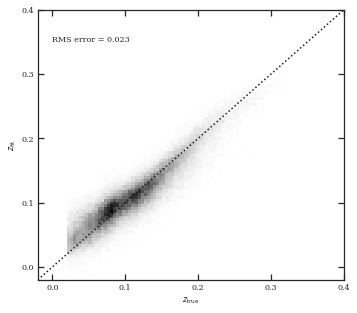

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata

from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
import matplotlib.pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes into array
# normalize to zero mean and unit variance for easier training
datanormed = np.zeros((len(data), 6), dtype=np.float32)
for i, band in enumerate(['u', 'g', 'r', 'i', 'z']):
    band = 'modelMag_' + band
    datanormed[:, i] = (data[band] - data[band].mean()) / data[band].std()

# put redshifts into array
datanormed[:, 5] = data['z']


# define structure of neural net
class Net(nn.Module):
    def __init__(self, nhidden):
        super(Net, self).__init__()
        self.fc_h = nn.Linear(5, nhidden)
        self.fc_o = nn.Linear(nhidden, 1)

    def forward(self, x):
        h = F.relu(self.fc_h(x))
        z = self.fc_o(h)
        return z


# split data into 9:1 train:test
dataset = torchdata.TensorDataset(torch.tensor(datanormed[:, 0:5]),
                                  torch.tensor(datanormed[:, 5]).view(-1, 1))
trainnum = datanormed.shape[0] // 10 * 9
traindata, testdata = torchdata.random_split(dataset, [trainnum, datanormed.shape[0] - trainnum])
traindataloader = torchdata.DataLoader(traindata, batch_size=128, shuffle=True)


@pickle_results('NNphotoz.pkl')
def train_NN():
    model = Net(4)
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5, threshold=1e-3)

    min_valid_loss = float('inf')
    badepochs = 0
    for t in range(1000):
        train_loss = 0
        for i, databatch in enumerate(traindataloader, 0):
            photometry, redshifts = databatch
            optimizer.zero_grad()
            z_pred = model(photometry)
            loss = criterion(z_pred, redshifts)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        with torch.no_grad():
            photometry = testdata[:][0]
            redshifts = testdata[:][1]
            z_pred = model(photometry)
            valid_loss = criterion(z_pred, redshifts)
            if t % 10 == 0:
                print('Epoch %3i: train loss %0.3e validation loss %0.3e' % (t, \
                        train_loss / len(traindata), valid_loss / len(testdata)))
            # stop training if validation loss has not fallen in 10 epochs
            if valid_loss > min_valid_loss*(1-1e-3):
                badepochs += 1
            else:
                min_valid_loss = valid_loss
                badepochs = 0
            if badepochs == 10:
                print('Finished training')
                break
        scheduler.step(valid_loss)
    return model


model = train_NN()

# plot the results
with torch.no_grad():
    photometry = testdata[:][0]
    redshifts = testdata[:][1]
    z_pred = model(photometry)
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(wspace=0.25,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    ax = plt.axes()
    #ax.scatter(redshifts, z_pred, s=1, lw=0, c='k')
    H, zs_bins, zp_bins = np.histogram2d(redshifts.numpy().flatten(), z_pred.numpy().flatten(), 151)
    ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
               extent=[zs_bins[0], zs_bins[-1], zp_bins[0], zp_bins[-1]],
               cmap=plt.cm.binary)
    ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
    rms = np.sqrt(np.mean((z_pred-redshifts).numpy()**2))
    ax.text(0, 0.35, 'RMS error = %0.3f' % np.sqrt(np.mean((z_pred-redshifts).numpy()**2)))
    ax.set_xlim(-0.02, 0.4001)
    ax.set_ylim(-0.02, 0.4001)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.set_xlabel(r'$z_{\rm true}$')
    ax.set_ylabel(r'$z_{\rm fit}$')
    plt.show()


    Downloading http://www.astro.washington.edu/users/ivezic/DMbook/data/SDSSspecgalsDR8.fit

    @pickle_results: computing results and saving to 'NNphotoz.pkl'
    Epoch   0: train loss 1.169e-03 validation loss 7.723e-04
    Epoch  10: train loss 5.723e-04 validation loss 5.878e-04
    Epoch  20: train loss 5.605e-04 validation loss 5.737e-04
    Epoch  30: train loss 5.537e-04 validation loss 5.704e-04
    Epoch  40: train loss 5.490e-04 validation loss 5.678e-04
    Epoch    48: reducing learning rate of group 0 to 1.0000e-04.
    Epoch  50: train loss 5.439e-04 validation loss 5.632e-04
    Epoch    55: reducing learning rate of group 0 to 1.0000e-05.
    Finished training

## References
- COLLOBERT, Ronan; KAVUKCUOGLU, Koray; FARABET, Clément. Torch7: A matlab-like environment for machine learning. In: BigLearn, NIPS workshop. 2011.

- VANDERPLAS, J. T. et al. Introduction to astroML: Machine learning for astrophysics. Conference on Intelligent Data Understanding (CIDU). Anais...2012